## create decorate

In [34]:
from functools import wraps
def trace(func):
    @wraps(func)
    def callf(*args, **kwargs):
        '''A wrapper function.'''
        print("Calling function: {}".format(func.__name__))
        res = func(*args, **kwargs)
        print("Return value: {}".format(res))
        return res
    return callf
    
@trace
def foo(x):
    '''Return value square.'''
    return x*x
if __name__ == "__main__":
    print(foo(3))
    print(foo.__doc__)
    print(foo.__name__)
    

Calling function: foo
Return value: 9
9
Return value square.
foo


In [140]:
from functools import wraps
def foo(x):
    '''Return value square.'''
    return x*x
def trace():
    func = foo(5)
    @wraps(func)
    def callf(*args, **kwargs):
        '''A wrapper function.'''
        print("Calling function: {}".format(func.__name__))
        res = func(*args, **kwargs)
        print("Return value: {}".format(res))
        return res
    return callf
    
# @trace

if __name__ == "__main__":
    a = trace()
    print(a)
#     print(foo(3))
#     print(foo.__doc__)
#     print(foo.__name__)

<function trace.<locals>.callf at 0x7fa77aeb00d0>


## inspect model test.

In [11]:
def debug():
    import inspect
    caller_name = inspect.stack()[1][3]
    print("[Debug]: enter {}()".format(caller_name))
def say_hello():
    debug()
    print("hello")
def say_goodbye():
    debug()
    print("good bye")
if __name__ == "__main__":
    say_hello()
    say_goodbye()
    

[Debug]: enter say_hello()
hello
[Debug]: enter say_goodbye()
good bye


## decorate test v2.0

In [13]:
def debug(func):
    def wrapper(*args, **kwargs):
        print("[DEBUG]: enter {}()".format(func.__name__))
        print("Prepare and saying...")
        return func(*args, **kwargs)
    return wrapper
@debug
def say(x):
    print("hello {}".format(x))
    
if __name__ == "__main__":
    say("hahha")

[DEBUG]: enter say()
Prepare and saying...
hello hahha


## wrapper with params.

In [23]:
class logging(object):
    def __init__(self, level="INFO"):
        self.level = level
        
    def __call__(self, func):
        def wrapper(*args, **kwargs):
            print("[{level}]: enter function {func}()".format(level=self.level, func=func.__name__))
            func(*args, **kwargs)
#             return func(*args, **kwargs)
        return wrapper
@logging(level="INOF")
def say(x):
    print("hello {}".format(x))
if __name__ == "__main__":
    say("hahaha")
    

    
    
    
    

[INOF]: enter function say()
hello hahaha


## inside wrapper @property

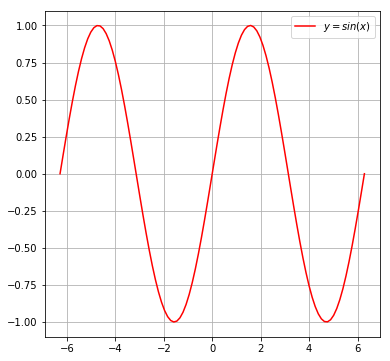

plot_sin function cost time: 0.1657559871673584s


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time

def plot_sin():
    PI = np.pi
    x = np.linspace(-2*PI, 2*PI, 100)
    y = np.sin(x)
    plt.figure(figsize=(6, 6))
    plt.grid()
    plt.plot(x, y, 'r-', label="$y=sin(x)$")
    plt.legend()
    plt.show()
    
#     print(x)
# plot_sin()

def time_cal(func):
    def wrapper(*args, **kwargs):
        time_start = time.time()
        func()
        time_end = time.time()
        time_cost = time_end - time_start
        return time_cost
    return wrapper

@time_cal
def plot_sin():
    PI = np.pi
    x = np.linspace(-2*PI, 2*PI, 100)
    y = np.sin(x)
    plt.figure(figsize=(6, 6))
    plt.grid()
    plt.plot(x, y, 'r-', label="$y=sin(x)$")
    plt.legend()
    plt.show()
    
if __name__ == "__main__":
    print("plot_sin function cost time: {}s".format(plot_sin()))
    
    
    
    

In [51]:
def wrapper_1(func):
    def output_a(*args, **kwargs):
#         print("wrapper 1")
#         func(*args, **kwargs)
        
#         print("first wrapper!")
    return output_a
def wrapper_2(func):
    def output_b(*args, **kwargs):
#         print("wrapper 2")
#         func(*args, **kwargs)
        
#         print("second wrapper!")
    return output_b

@wrapper_1
@wrapper_2
def foo():
#     return "hahha"
    print("hahaha")
    
if __name__ == "__main__":
    print(foo())
    
    
    
    
    
    
    
    

<function wrapper_1.<locals>.output_a.<locals>.<lambda> at 0x7fa77ae31950>


## wrapper execution sequence

In [57]:
def wrapper_1(func):
    return lambda: "w1 "+func()+"w1 "
def wrapper_2(func):
    return lambda:"w2"+func()+"w2 "
@wrapper_1
@wrapper_2
def foo():
    return " hahah "
if __name__ == "__main__":
    print(foo())

w1 w2 hahah w2 w1 


## property wrapper

In [62]:
class Foo(object):
    def __init__(self, var):
        self._var = var
        
    @property
    def var(self):
        return self._var
    @var.setter
    def var(self, var):
        self._var = var
foo = Foo("var_1")
print(foo.var)
foo.var = "var_2"
print(foo.var)

var_1
var_2


## @property

In [142]:
class Foo(object):
    def __init__(self, name, score):
        self.name = name
        self.__score = score
    @property
    def score(self):
        return self.__score
    @score.setter
    def score(self, value):
        if value > 100:
            raise ValueError('invalid score')
        self.__score = value
    @score.deleter
    def score(self):
        del self.__score

if __name__ == "__main__":            
            
    foo = Foo("hahah", 100)
    print(foo.score)
    foo.score = 1000
    foo.score
    foo.score
#     print(s.score)
#     print(s.__score)

100


ValueError: invalid score

In [109]:
class Foo(object):
    def __init__(self):
        self._x = None
    def getx(self):
        print("get_x invoked")
        return self._x
    def setx(self, value):
        print("set_x invoked")
        self._x = value
    def delx(self):
        print("del_x invoked")
        del self._x
    x = property(getx, setx, delx, "hahha")
    
if __name__ == "__main__":
    foo = Foo()
    print(help(foo))
    '''set'''
    foo.x = '100'
    '''get'''
    foo.x
    '''delete'''
    del foo.x

Help on Foo in module __main__ object:

class Foo(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  delx(self)
 |  
 |  getx(self)
 |  
 |  setx(self, value)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  x
 |      hahha

None
set_x invoked
get_x invoked
del_x invoked


In [153]:
class Foo(object):
    def __init__(self):
        self._x = None
    @property
    def x(self):
        '''Get value.'''
        print("get")
        return self._x
    @x.setter
    def x(self, value):
        '''Set value.'''
        print("set")
        if value > 10:
            raise ValueError("invalid value")
        self._x = value
    @x.deleter
    def x(self):
        '''Delete value.'''
        print("delete attribute")
        del self._x
        
if __name__ == "__main__":
    foo = Foo()
    print(help(foo))
    '''set'''
    foo.x = 1
    '''get'''
    print("x value: {}".format(foo.x))
    '''delete'''
    del foo.x
    '''get'''
    print("x value: {}".format(foo.x))
    

Help on Foo in module __main__ object:

class Foo(builtins.object)
 |  Methods defined here:
 |  
 |  __init__(self)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)
 |  
 |  x
 |      Get value.

None
set
get
x value: 1
delete attribute
get


AttributeError: 'Foo' object has no attribute '_x'